# IET NITK - CV For Beginners- Session 2 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
plt.rcParams["figure.figsize"] = (10,10)

# 1. HOW TO OUTPUT AN IMAGE IN OPENCV

In [2]:
# Reading an image
carImage = cv2.imread('./images/car.jpg')

# Showing the image using OpenCV
cv2.imshow('Car', carImage)

# Press a key to close the image
cv2.waitKey(0)
cv2.destroyAllWindows()

Actual way of plotting an image


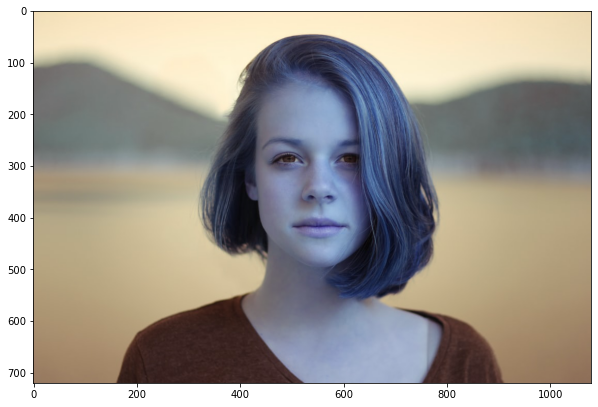

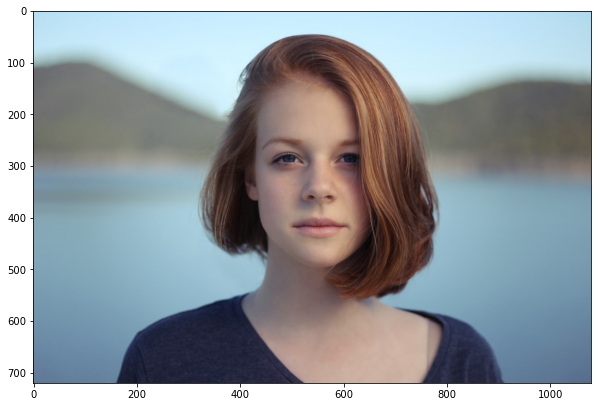

In [5]:
# Reading an image
portrait = cv2.imread('./images/portrait.jpg')

# Showing image through Matplotlib
plt.imshow(portrait)
plt.show()

# Showing image through Matplotlib
'''
OpenCV stores images in BGR format whereas matplotlib stores images in RGB!!!
'''

print('Actual way of plotting an image')
portrait_RGB = cv2.cvtColor(portrait, cv2.COLOR_BGR2RGB)
plt.imshow(portrait_RGB)
plt.show()

---
# 2. CLICK EVENTS

- OpenCV sometimes helps to control and manage different types of mouse events and gives us the flexibility to manage them. 
- There can be different types of mouse events such as left button click, right button click, double_click, etc. 
- To manage these events we need to design callback functions for each type of mouse click event while the window or frame is opened by OpenCV.
- The callback function will be helpful to implement what type of functionality you want with a particular mouse click event.



In [6]:
# LIST OF MOUSE EVENTS

events = [i for i in dir(cv2) if 'EVENT' in i]

for i, event in enumerate(events):
    print(i, '\t', event)

0 	 EVENT_FLAG_ALTKEY
1 	 EVENT_FLAG_CTRLKEY
2 	 EVENT_FLAG_LBUTTON
3 	 EVENT_FLAG_MBUTTON
4 	 EVENT_FLAG_RBUTTON
5 	 EVENT_FLAG_SHIFTKEY
6 	 EVENT_LBUTTONDBLCLK
7 	 EVENT_LBUTTONDOWN
8 	 EVENT_LBUTTONUP
9 	 EVENT_MBUTTONDBLCLK
10 	 EVENT_MBUTTONDOWN
11 	 EVENT_MBUTTONUP
12 	 EVENT_MOUSEHWHEEL
13 	 EVENT_MOUSEMOVE
14 	 EVENT_MOUSEWHEEL
15 	 EVENT_RBUTTONDBLCLK
16 	 EVENT_RBUTTONDOWN
17 	 EVENT_RBUTTONUP


In [7]:
# USE OF CLICK EVENTS - EXAMPLE 1

# Callback function
def click_event(event, x, y, flags, param):
    
    # On clicking left mouse button
    if event == cv2.EVENT_LBUTTONDOWN:
        coordinate = str(x) + "," + str(y)
        font = cv2.FONT_HERSHEY_PLAIN
        
        cv2.circle(img, (x,y), 3, (255,255,0), -1)
        cv2.putText(img, coordinate, (x+10, y+10), font, 1.5, (0, 255, 0), 2)
        cv2.imshow('image', img)
        
    # On clicking right mouse button
    if event == cv2.EVENT_RBUTTONDOWN:
        blue = img[y][x][0]
        green = img[y][x][1]
        red = img[y][x][2]
        channel = str(blue) + "," + str(green) + "," + str(red)
        font = cv2.FONT_HERSHEY_PLAIN
        
        cv2.circle(img, (x,y), 3, (255,255,0), -1)
        cv2.putText(img, channel, (x+10, y+10), font, 1.5, (0, 0, 255), 2)
        cv2.imshow('image', img)      
        

# Driver code    
img = cv2.imread('./images/gradient.jpg', 1)
cv2.imshow('image', img)

cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# USE OF CLICK EVENTS - EXAMPLE 2

# Callback function
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), 3, (0,0,255), -1)
        points.append((x,y))
        
        if len(points) >= 2:
            cv2.line(img, points[-1], points[-2], (255,0,0), 5)
        cv2.imshow('Canvas', img)


# Driver code
img = np.zeros((512, 512, 3), np.uint8)
points = []

cv2.imshow('Canvas', img)
cv2.setMouseCallback('Canvas', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

---
# 3. THRESHOLDING

- Thresholding is a very popular segmentation technique, used for separating an object considered as a foreground from its background. 
- A threshold is a value which has two regions on its either side i.e. below the threshold or above the threshold.
<br><br>

**Syntax:** cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)

**Parameters:**
- source: Input Image array (must be in Grayscale).
- thresholdValue: Value of Threshold below and above which pixel values will change accordingly.
- maxVal: Maximum value that can be assigned to a pixel.
- thresholdingTechnique: The type of thresholding to be applied.
<br><br>

---
The different Simple Thresholding Techniques are:

- cv2.THRESH_BINARY:  
    If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).  
- cv2.THRESH_BINARY_INV:  
    Inverted or Opposite case of cv2.THRESH_BINARY.  
- cv.THRESH_TRUNC:  
    If pixel intensity value is greater than threshold, it is truncated to the threshold. The pixel - values are set to be the same as the threshold. All other values remain the same.  
- cv.THRESH_TOZERO:  
    Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.  
- cv.THRESH_TOZERO_INV:  
    Inverted or Opposite case of cv2.THRESH_TOZERO.  

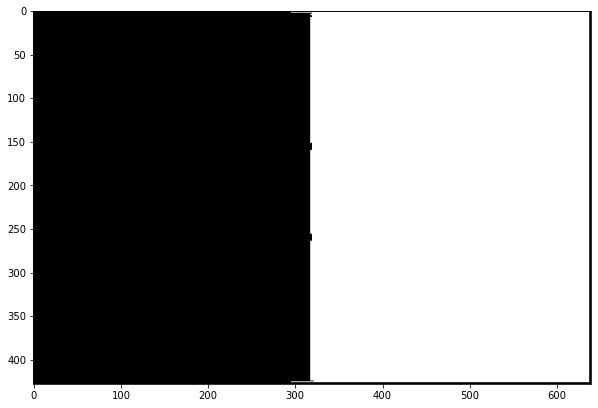

In [9]:
# THRESHOLD 1- cv2.THRESH_BINARY

# In this image the pixel intensity changes from 0 to 255 from left to right
img = cv2.imread('./images/gradient.jpg', 0)

# Values less than 127 are assigned 0 (black) and greater than 127 are assigned 255 (white)
_, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

plt.imshow(th1, 'gray', vmin=0,vmax=255)

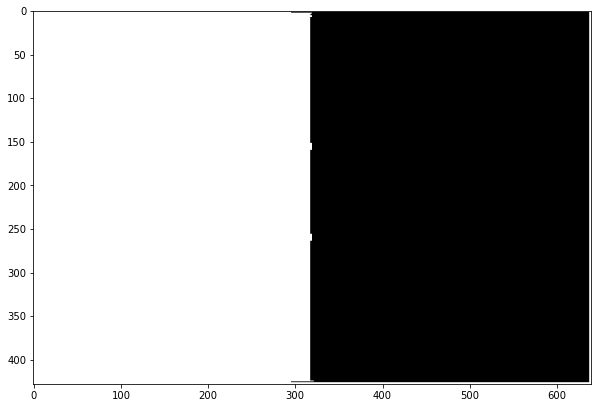

In [10]:
# THRESHOLD 2- cv2.THRESH_BINARY_INV

# Does the opposite of the previous threshold
_, th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

plt.imshow(th2, 'gray', vmin=0,vmax=255)

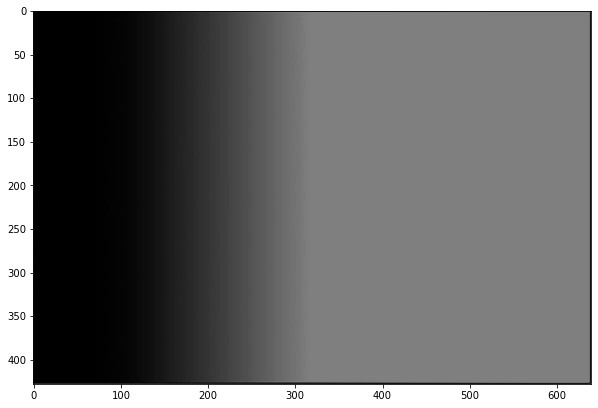

In [11]:
# THRESHOLD 3- cv2.THRESH_TRUNC

# Upto 127 (threshold value) the pixel intensity remains same
# After 127 the pixel intensity becomes uniform and is equal to 127 only
_, th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)

plt.imshow(th3, 'gray', vmin=0,vmax=255)

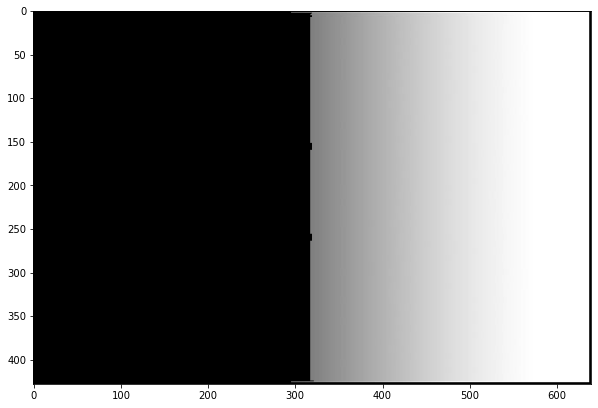

In [12]:
# THRESHOLD 4- cv2.THRESH_TOZERO

# If pixel value is less than 127, the pixel value becomes 0
# If pixel value is greater than 127, the pixel value is left unchanged
_, th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)

plt.imshow(th4, 'gray', vmin=0,vmax=255)

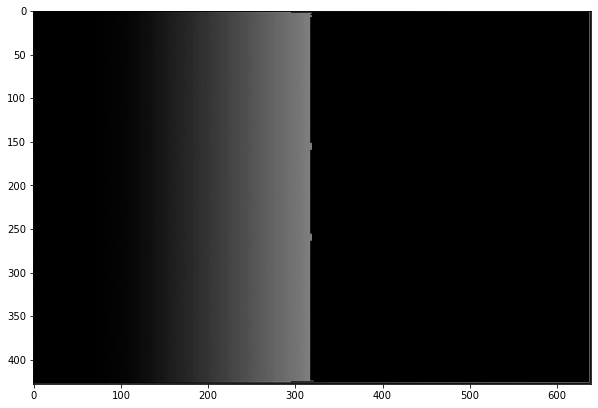

In [13]:
# THRESHOLD 5-cv2.THRESH_TOZERO_INV

# Opposite of previous thresholding
_, th5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

plt.imshow(th5, 'gray', vmin=0,vmax=255)

---
**Adaptive thresholding**

- Till now, we used one global value as a threshold. 
- But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. - In that case, adaptive thresholding can help. 
- Here, the algorithm determines the threshold for a pixel based on a small region around it. 
- So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.
<br><br>

In addition to the parameters described above, the method **cv.adaptiveThreshold** takes three input parameters:

The adaptiveMethod decides how the threshold value is calculated:

- cv2.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.

The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.

In [14]:
# Adaptive thresholding
# An image maynot have perfect lighting conditions. For that adaptive thresholding is better

# For this to work the source image must be in grayscale. So use 0 flag index during image reading.
img = cv2.imread('./images/sudoku.jpg', 0)

_, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

cv2.imshow('Image', img)
cv2.imshow('Threshold image', th1)
cv2.imshow('Adaptive Threshold image- mean', th2)
cv2.imshow('Adaptive Threshold image- guassian', th3)

cv2.waitKey(0)
cv2.destroyAllWindows()

---
# 4. BITWISE OPERATIONS

Bitwise operations are used in image manipulation and used for extracting essential parts in the image. In this article, Bitwise operations used are :

- AND
- OR
- XOR
- NOT

---
**BITWISE AND**

Bit-wise conjunction of input array elements.

Syntax: cv2.bitwise_and(source1, source2, destination, mask)

Parameters:
- source1: First Input Image array(Single-channel, 8-bit or floating-point)
- source2: Second Input Image array(Single-channel, 8-bit or floating-point)
- dest: Output array (Similar to the dimensions and type of Input image array)
- mask: Operation mask, Input / output 8-bit single-channel mask

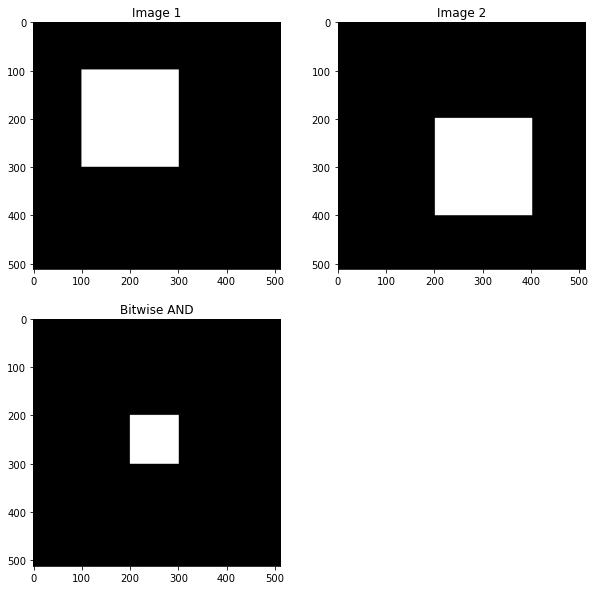

In [15]:
img1 = np.zeros((512,512,3), np.uint8)
img2 = np.zeros((512,512,3), np.uint8)

img1 = cv2.rectangle(img1, (100, 100), (300, 300), (255, 255, 255), -1)  # Making white rectangle
img2 = cv2.rectangle(img2, (200, 200), (400, 400), (255, 255, 255), -1)  # Making white rectangle

# Bitwise and functions as AND logic gate.
# Black colour is 0 and white colour is 1.
# So in the above images those pixels which are white in both images give white as result after Bit- And

# Black & Black = Black (0 & 0 = 0)
# Black & White = Black (0 & 1 = 0)
# White & White = White (1 & 1 = 1)
bitAnd = cv2.bitwise_and(img2, img1)

#Plotting
plt.subplot(2, 2, 1)
plt.imshow(img1, 'gray', vmin=0,vmax=255)
plt.title('Image 1')

plt.subplot(2, 2, 2)
plt.imshow(img2, 'gray', vmin=0,vmax=255)
plt.title('Image 2')

plt.subplot(2, 2, 3)
plt.imshow(bitAnd, 'gray', vmin=0,vmax=255)
plt.title('Bitwise AND')
plt.show()

---
**BITWISE OR**

Bit-wise disjunction of input array elements.

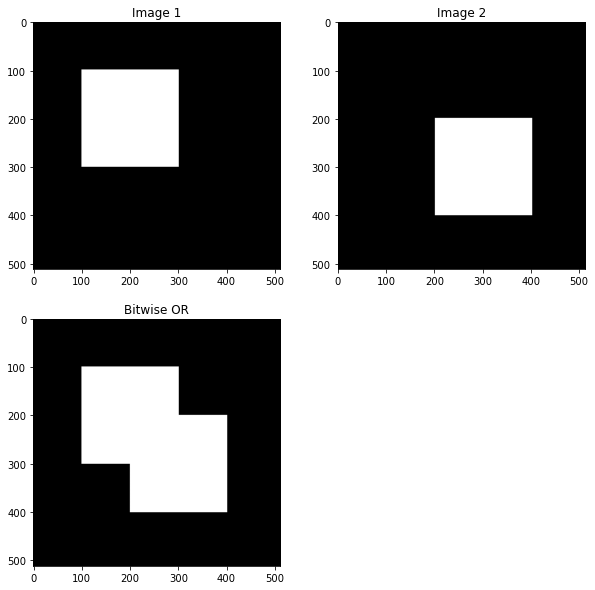

In [16]:
img1 = np.zeros((512,512,3), np.uint8)
img2 = np.zeros((512,512,3), np.uint8)

img1 = cv2.rectangle(img1, (100, 100), (300, 300), (255, 255, 255), -1)  # Making white rectangle
img2 = cv2.rectangle(img2, (200, 200), (400, 400), (255, 255, 255), -1)  # Making white rectangle

# Bitwise or functions as OR logic gate.

# Black | Black = Black (0 | 0 = 0)
# Black | White = White (0 | 1 = 1)
# White | White = White (1 | 1 = 1)

# All white areas are merged.
bitOr = cv2.bitwise_or(img2, img1)

# Plotting
plt.subplot(2, 2, 1)
plt.imshow(img1, 'gray', vmin=0,vmax=255)
plt.title('Image 1')

plt.subplot(2, 2, 2)
plt.imshow(img2, 'gray', vmin=0,vmax=255)
plt.title('Image 2')

plt.subplot(2, 2, 3)
plt.imshow(bitOr, 'gray', vmin=0,vmax=255)
plt.title('Bitwise OR')
plt.show()

---
**BITWISE XOR**

Bit-wise XOR of input array elements.

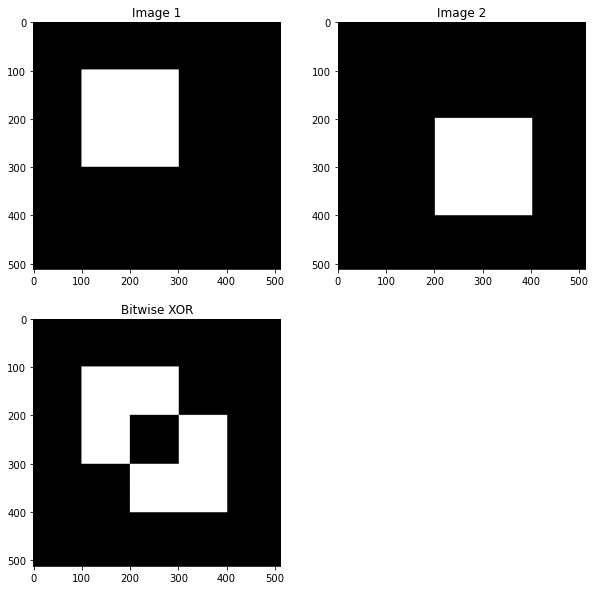

In [17]:
img1 = np.zeros((512,512,3), np.uint8)
img2 = np.zeros((512,512,3), np.uint8)

img1 = cv2.rectangle(img1, (100, 100), (300, 300), (255, 255, 255), -1)  # Making white rectangle
img2 = cv2.rectangle(img2, (200, 200), (400, 400), (255, 255, 255), -1)  # Making white rectangle

# Bitwise XOR

bitXor = cv2.bitwise_xor(img2, img1)

# Plotting
plt.subplot(2, 2, 1)
plt.imshow(img1, 'gray', vmin=0,vmax=255)
plt.title('Image 1')

plt.subplot(2, 2, 2)
plt.imshow(img2, 'gray', vmin=0,vmax=255)
plt.title('Image 2')

plt.subplot(2, 2, 3)
plt.imshow(bitXor, 'gray', vmin=0,vmax=255)
plt.title('Bitwise XOR')
plt.show()

---
**BITWISE NOT**

Bit-wise negation of input array elements.

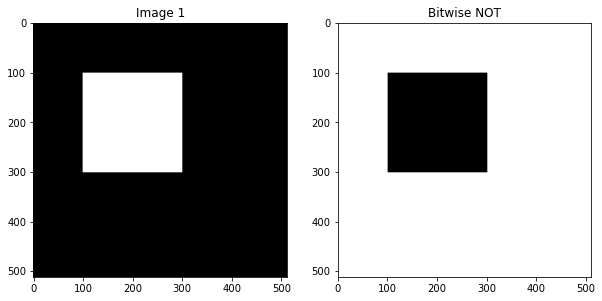

In [19]:
# Bitwise NOT

bitNot1 = cv2.bitwise_not(img1)

# Plotting
plt.subplot(1, 2, 1)
plt.imshow(img1, 'gray', vmin=0,vmax=255)
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(bitNot1, 'gray', vmin=0,vmax=255)
plt.title('Bitwise NOT')
plt.show()

---
# 5. COLOR DETECTION

In [21]:
frame = cv2.imread('./images/chips.png')
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

l_b = np.array([110, 50, 50])    # Lower range for blue color in hsv
u_b = np.array([130, 255, 255])  # Upper range for blue color in hsv

# Create a mask
mask = cv2.inRange(hsv, l_b, u_b)

# ANDing of original pic and mask gives us the result
res = cv2.bitwise_and(frame, frame, mask = mask)

cv2.imshow('frame', frame)
cv2.imshow('mask', mask)
cv2.imshow('res', res)

cv2.waitKey(0)
cv2.destroyAllWindows()

---
# END OF SESSION